### Imports


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import yaml

### Read the data


In [6]:
file_path = "../../experiments/fault_and_hit_ratio_exp.yaml"

with open(file_path, "r") as file:
    experiments = yaml.safe_load(file)

experiments

{'experiment_1': {'test_type': 'brightkite',
  'test_number': 3,
  'solutions': [{'solution_name': '2Q',
    'fault_score': 0,
    'hit_score': 0,
    'solution_hit_ratio_per_tenant': [{'tenant_1': 0.38952380952380955},
     {'tenant_2': 0.2671428571428571},
     {'tenant_3': 0.69},
     {'tenant_4': 0.7638095238095238},
     {'tenant_5': 0.6409523809523809}]},
   {'solution_name': 'Belady',
    'fault_score': 0,
    'hit_score': 0,
    'solution_hit_ratio_per_tenant': [{'tenant_1': 0.45095238095238094},
     {'tenant_2': 0.3557142857142857},
     {'tenant_3': 0.7614285714285715},
     {'tenant_4': 0.8233333333333334},
     {'tenant_5': 0.7214285714285714}]},
   {'solution_name': 'LFU',
    'fault_score': 0.01813350237820555,
    'hit_score': 0.02622288620138287,
    'solution_hit_ratio_per_tenant': [{'tenant_1': 0.38476190476190475},
     {'tenant_2': 0.24571428571428572},
     {'tenant_3': 0.6966666666666667},
     {'tenant_4': 0.7790476190476191},
     {'tenant_5': 0.621428571428571

### Create a dataframe with data needed for plot of fault score per experiment per solution


In [7]:
data_list = []
for experiment, details in experiments.items():
    for solution in details["solutions"]:
        data_list.append(
            {
                "Experiment": experiment,
                "Solution Name": solution["solution_name"],
                "Fault Score": solution["fault_score"],
            }
        )

df_solutions = pd.DataFrame(data_list)

df_solutions.head()

,Experiment,Solution Name,Fault Score
0,experiment_1,2Q,0.000000
1,experiment_1,Belady,0.000000
2,experiment_1,LFU,0.018134
3,experiment_1,LIRS,0.000513
4,experiment_1,LRFU,0.020151


#### Create a table for fault score per experiment and solution name


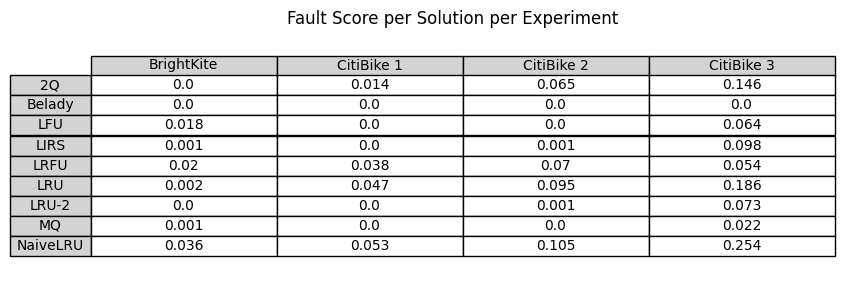

In [8]:
table_fault_score_per_solution = df_solutions[
    df_solutions["Solution Name"] != "Judge"
].pivot_table(
    index="Solution Name", columns="Experiment", values="Fault Score", aggfunc="mean"
)

table_fault_score_per_solution_rounded = table_fault_score_per_solution.round(3)

fig, ax = plt.subplots(figsize=(8, 3))
fig.suptitle(
    "Fault Score per Solution per Experiment",
    fontsize=12,
)
ax.axis("off")

table = ax.table(
    cellText=table_fault_score_per_solution_rounded.values,
    rowLabels=table_fault_score_per_solution_rounded.index,
    colLabels=["BrightKite", "CitiBike 1", "CitiBike 2", "CitiBike 3"],
    cellLoc="center",
    rowLoc="center",
    loc="center",
)

table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)

for pos, cell in table.get_celld().items():
    if pos[0] == 0 or pos[1] == -1:
        cell.set_facecolor("lightgray")

# Saving the plot
plt.savefig(
    "../../experiments/tables/fault_score_per_solution_per_experiment.png",
    bbox_inches="tight",
    dpi=300,
)